## Seasonality

In [1]:
#Import the necessary packages again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Create a function called 'time_series_line' which can be done for simple Time Series Graphs with a line connecting each point
def line_time_series(xdata,ydata,title,xlabel,ylabel,marker='o'):
    ydata.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
#Load in the datasets that have been joined in SQL so that all variables have been included
#This file is found in R_files in chapter 1 yearly cars sold as cars_sold_economic_socioeconomic_data.csv
monthly_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/R_files/chapter 1 yearly cars sold/monthly_car_sales_all_data.csv')
#This is going to set the index to month so that you can sense of the data easier
monthly_data.set_index(monthly_data['month'],inplace=True)
#The column month remains in the dataframe so it needs to be deleted
monthly_data.drop(columns='month',inplace=True)
#The month also needs to viewed as datetime so that it can graphed as a time series
monthly_data.index = pd.to_datetime(monthly_data.index)
monthly_data

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2002-01-01,31106,49927,755015820,386481929,81033,1141497749,2.6,5.5,5.0
2002-02-01,27520,50982,664454223,361353242,78502,1025807465,2.6,5.2,5.0
2002-03-01,34225,58794,805666244,419385387,93019,1225051631,2.4,5.1,5.0
2002-04-01,36452,59817,846368297,433061150,96269,1279429447,2.5,4.9,4.9
2002-06-01,36348,55415,830251613,414731166,91763,1244982779,2.3,5.1,4.8
...,...,...,...,...,...,...,...,...,...
2023-06-01,27001,50613,1214340987,814275863,77614,2028616850,4.8,1.7,2.0
2023-07-01,26360,49502,1196918451,887723892,75862,2084642343,4.7,1.7,1.8
2023-08-01,25876,52725,1222581892,908454060,78601,2131035952,4.3,1.8,1.7


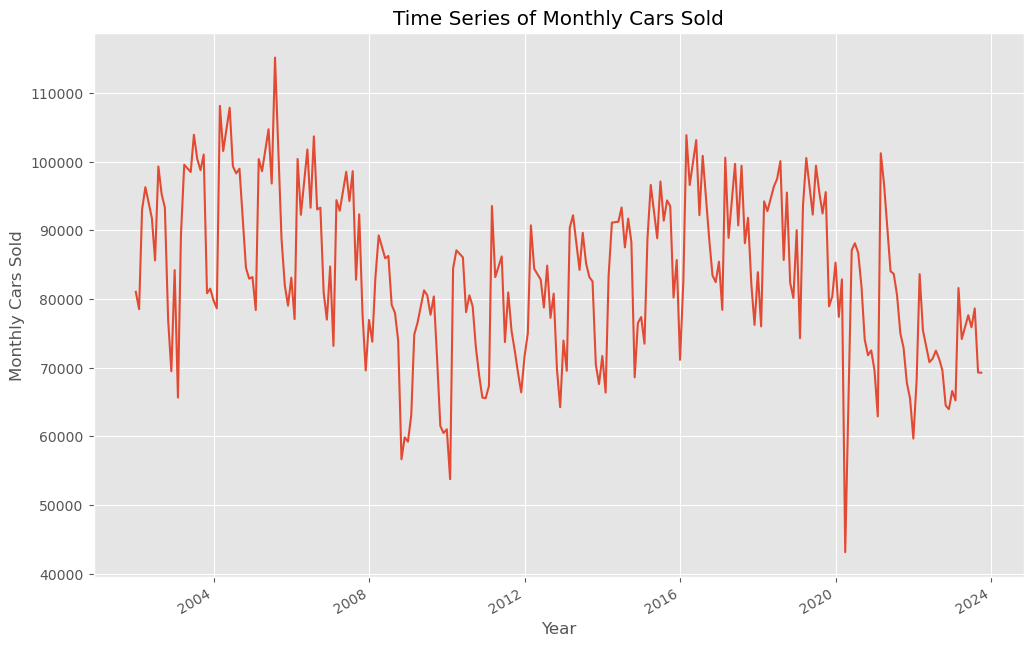

In [48]:
#Create a time series graph using the line time series to understand the seasonality that is occuring in the data
line_time_series(monthly_data.index,monthly_data['total_cars_sold'],'Time Series of Monthly Cars Sold', 'Year', 'Monthly Cars Sold')

In [64]:
def roll_mean_std_dev(df_column,window):

    #Look at the mean and the standard deviation of this data
    rolmean = df_column.rolling(window).mean()
    rolstd = df_column.rolling(window).std()

    #Let's check the stationarity of the graph
    #Plot the rolling statistics
    orig = plt.plot(df_column,color='blue',label='Original')
    mean = plt.plot(rolmean,color='red',label='Rolling Mean')
    std = plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean & Standard Deviation')
    plt.show(block=False)

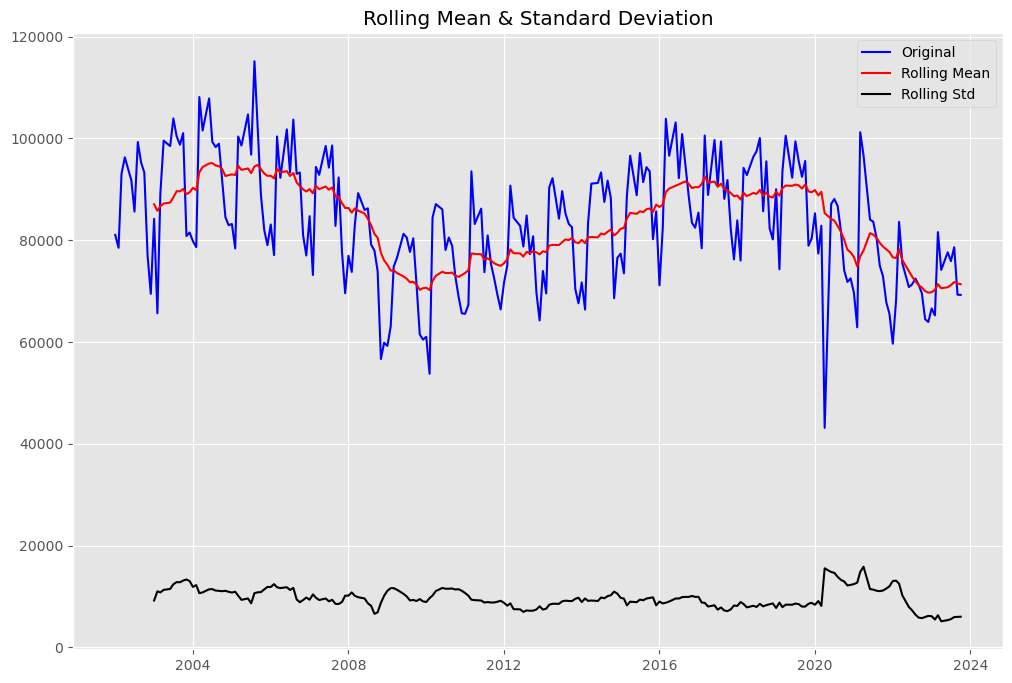

In [65]:
roll_mean_std_dev(monthly_data['total_cars_sold'], 12)

This is a similar to graph as seen in chapter 1, however it makes the seasonality of the data a little bit more clear. You can observe that there are certain periods of time where car sales seems to follow a particular trend.
In particular lets observe how the data looks at:

- 2003-2008
- 2009-2016
- 2016-2020

You can see that these time periods might some seasonal componenet to the data. Where as 2020 onwards does seem to be very heavilty impacted by external economic and socioeconomic factors which will be explored later. 

In [32]:
def spliced_data(df,time_frame_1, time_frame_2):
    spliced_df  = df[((df.index >= time_frame_1) & (df.index <= time_frame_2))]
    return spliced_df

In [37]:
time_frame_1_df = spliced_data(monthly_data,'2003-01-01','2008-01-01')
time_frame_1_df

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2003-01-01,34707,49481,860730784,392438833,84188,1253169617,1.9,5.0,4.7
2003-02-01,24585,41048,615749948,323297077,65633,939047025,1.7,5.1,4.8
2003-03-01,32705,56513,791728069,413899574,89218,1205627643,1.7,5.0,4.8
2003-04-01,37682,61856,909778220,458127973,99538,1367906193,1.5,4.6,4.9
2003-06-01,38573,59904,941898387,455117890,98477,1397016277,1.5,5.3,4.9
...,...,...,...,...,...,...,...,...,...
2007-09-01,30248,52541,806385930,443757477,82789,1250143407,2.1,3.5,3.7
2007-10-01,32965,59348,885708713,516190017,92313,1401898730,2.2,3.5,3.7
2007-11-01,27160,50593,735515910,445062491,77753,1180578401,2.3,3.3,3.6


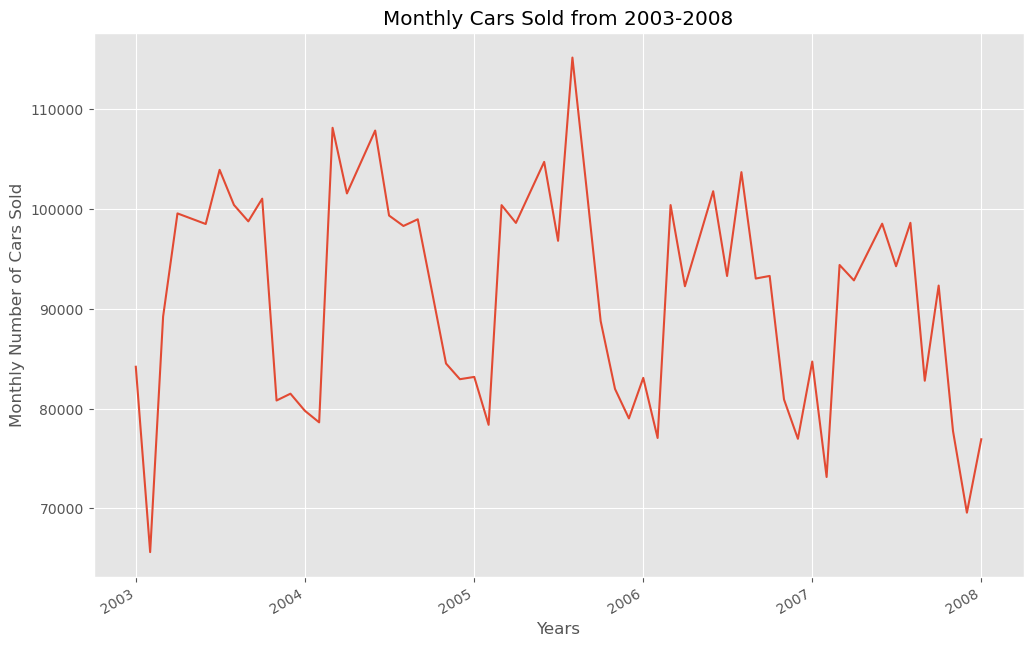

In [38]:
#Create a time series graph of the data that goes from 2003-2007
line_time_series(time_frame_1_df.index,time_frame_1_df['total_cars_sold'],'Monthly Cars Sold from 2003-2007','Years','Monthly Number of Cars Sold')

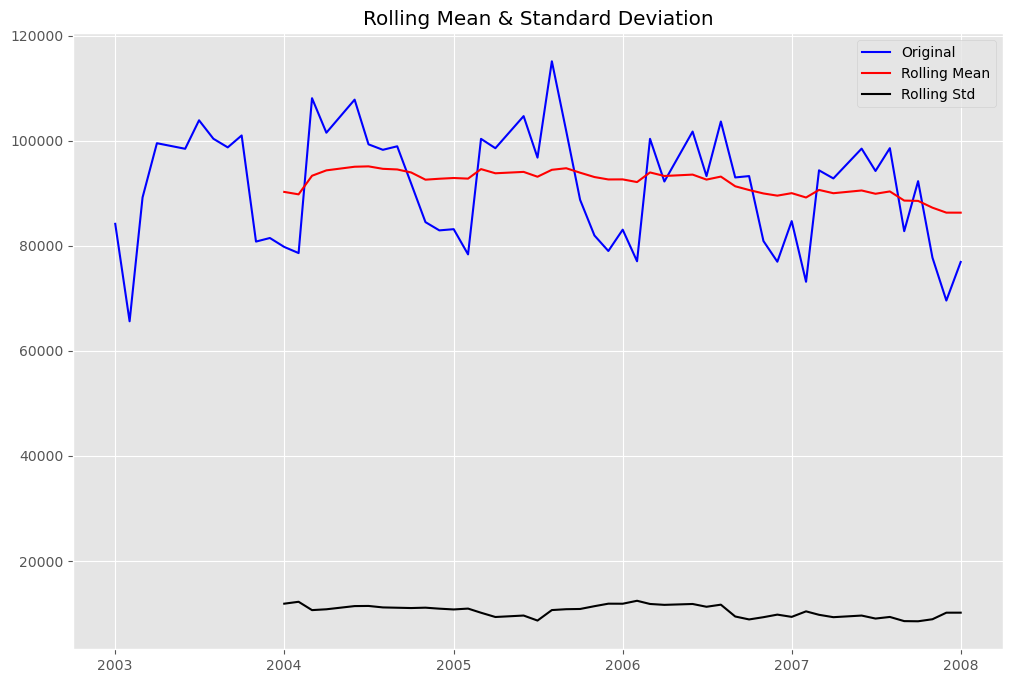

In [68]:
roll_mean_std_dev(time_frame_1_df['total_cars_sold'],12)

In [40]:
#Created a spliced dataframe of the data that goes from 2009-01-01 to 2016-01-01
time_frame_2_df = spliced_data(monthly_data,'2009-01-01','2016-01-01')
time_frame_2_df

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2009-01-01,17963,41254,504208132,320520578,59217,824728710,1.7,7.1,6.6
2009-02-01,14779,48308,418843100,332054088,63087,750897188,1.8,7.5,7.0
2009-03-01,17844,56948,465300148,390527459,74792,855827607,1.8,7.5,7.3
2009-04-01,20905,55631,526701218,390447902,76536,917149120,1.9,7.0,7.5
2009-06-01,24509,56732,627433850,411152753,81241,1038586603,1.7,8.0,7.7
...,...,...,...,...,...,...,...,...,...
2015-09-01,32154,62182,1035533325,632452008,94336,1667985333,1.9,4.6,4.8
2015-10-01,30552,62954,991747766,653329361,93506,1645077127,1.9,4.7,4.7
2015-11-01,25828,54354,858213639,568019044,80182,1426232683,2.0,4.5,4.7


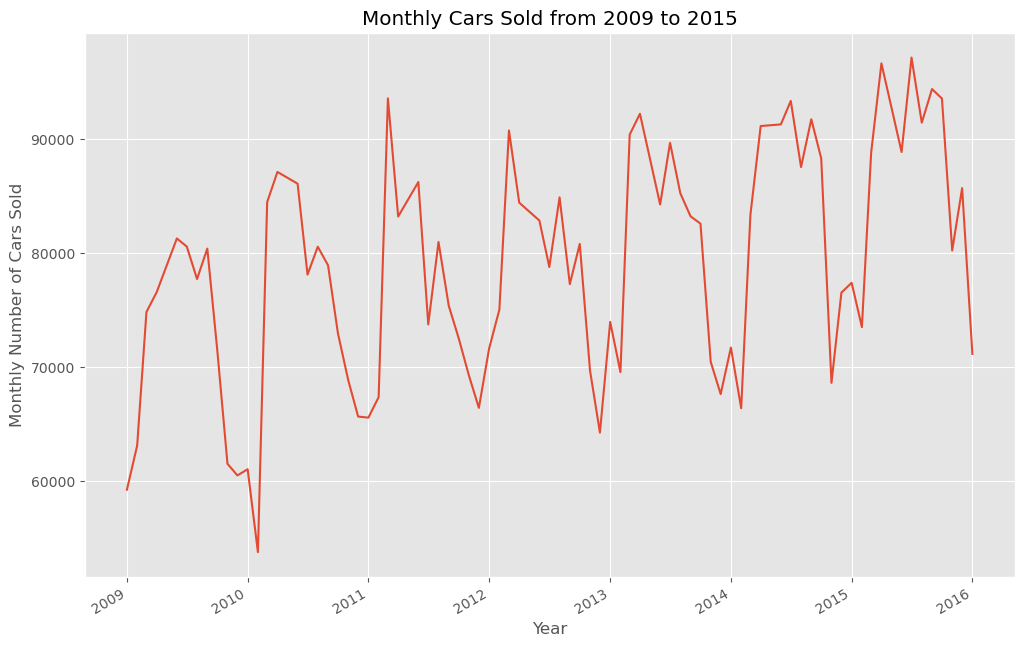

In [44]:
#Create a time series graph of the number of cars sold per month going from 2009 to 2015
line_time_series(time_frame_2_df.index,time_frame_2_df['total_cars_sold'],'Monthly Cars Sold from 2009 to 2015','Year','Monthly Number of Cars Sold')

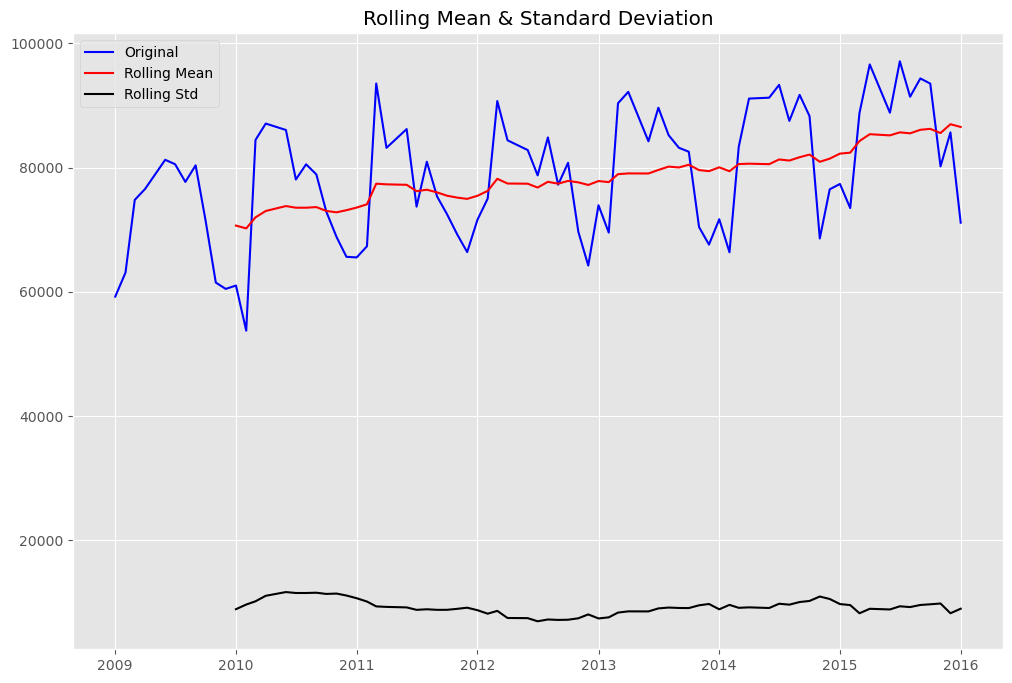

In [69]:
roll_mean_std_dev(time_frame_2_df['total_cars_sold'],12)

In [45]:
#Created a spliced dataframe of the data that goes from 2016-01-01 to 2020-01-01
time_frame_3_df = spliced_data(monthly_data,'2016-01-01','2020-01-01')
time_frame_3_df

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa
month,,,,,,,,,
2016-01-01,25835,45285,878106665,518918140,71120,1397024805,2.2,4.7,4.5
2016-02-01,24257,58184,813473347,581005001,82441,1394478348,2.3,4.7,4.4
2016-03-01,30675,73163,988609546,723865536,103838,1712475082,2.2,4.4,4.3
2016-04-01,29787,66793,943502901,693293383,96580,1636796284,2.1,4.0,4.3
2016-06-01,34366,68750,1094447550,751886189,103116,1846333739,2.2,4.5,4.3
...,...,...,...,...,...,...,...,...,...
2019-09-01,29591,62846,1068228890,744093843,92437,1812322733,2.4,3.0,3.3
2019-10-01,28967,66581,1055208739,819198662,95548,1874407401,2.3,3.1,3.3
2019-11-01,23573,55334,868580552,685903924,78907,1554484476,2.3,3.0,3.2


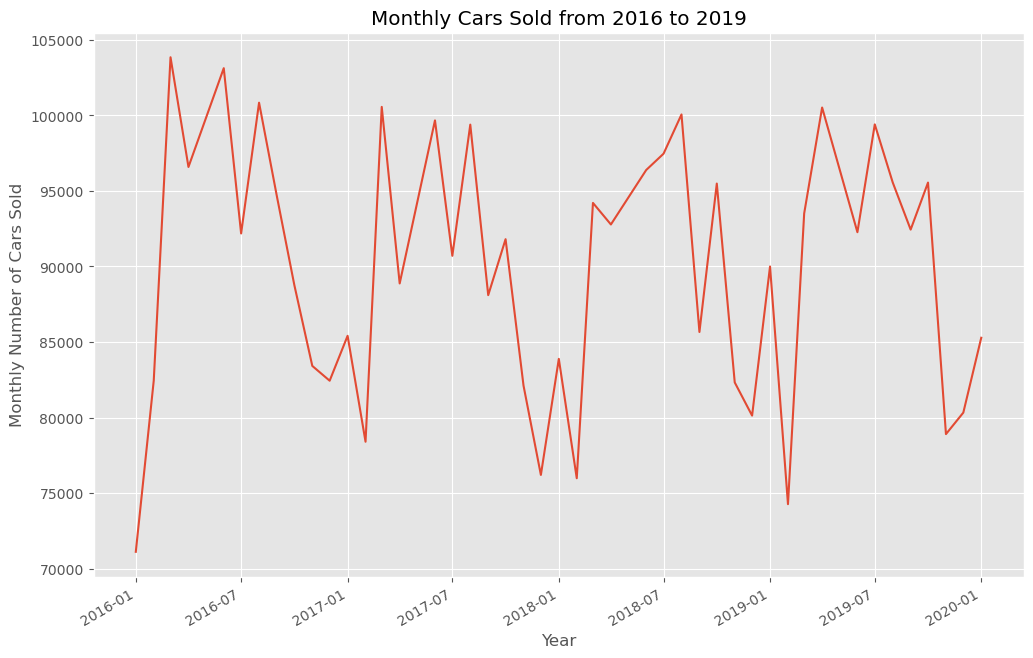

In [47]:
#Create a time series graph of the number of cars sold per month going from 2016-2019
line_time_series(time_frame_3_df.index,time_frame_3_df['total_cars_sold'],'Monthly Cars Sold from 2016 to 2019','Year','Monthly Number of Cars Sold')

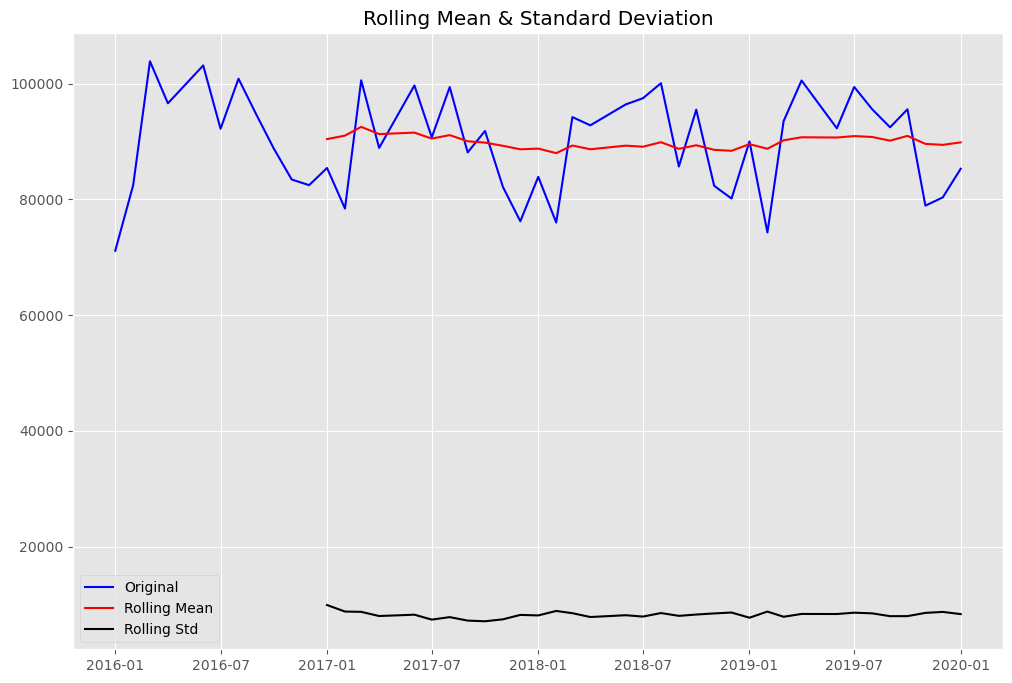

In [70]:
roll_mean_std_dev(time_frame_3_df['total_cars_sold'],12)

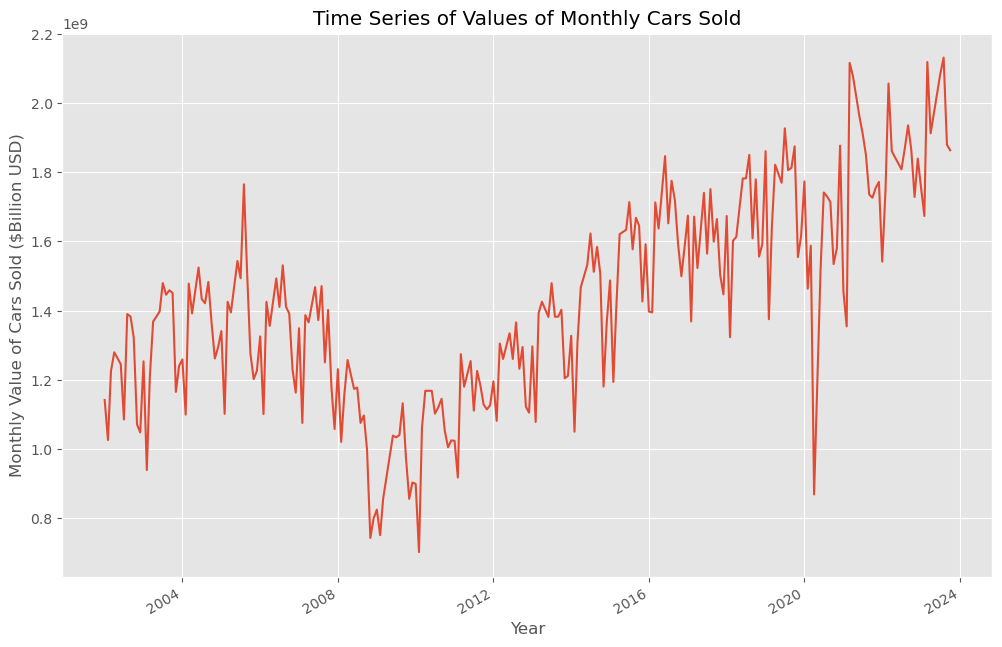

In [11]:
line_time_series(monthly_data.index,monthly_data['total_value_cars_sold'],'Time Series of Values of Monthly Cars Sold','Year','Monthly Value of Cars Sold ($Billion USD)')